In [1]:
#Importamos las librerias principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

In [2]:
#Cargamos el dataset y dividimos entre train y test
full_df = pd.read_csv('./airbnb-listings-extract.csv', sep=';', decimal='.')
from sklearn.model_selection import train_test_split
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos el train y el test en respectivos csv y despues 
#cargamos el train en un nuevo dataframe que es el que manipularemos
train.to_csv('./train.csv', sep=';', decimal='.', index=False)
test.to_csv('./test.csv', sep=';', decimal='.', index=False)
df_train = pd.read_csv('./train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


In [3]:
df_train.head()

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


In [4]:
#Como primer paso, vamos a eliminar del dataframe todas aquellas caracteristicas que corresponden a un texto
#Para ello vamos a eliminar todas las columnas que tengan alguna entrada mayor a 25 caracteres
delete_columns = df_train.select_dtypes(['object']).applymap(lambda x: len(str(x)) > 25).any(axis=0)
delete = delete_columns[delete_columns[:]==True]
delete = delete.axes[0].tolist()

print(f"En valor absoluto hemos quitado {len(delete)} columnas de {df_train.shape[1]}")
print(f"En valor relativo hemos quitado un {round((len(delete))*100/df_train.shape[1],2)} % de las columnas")

df_train = df_train.drop(columns=delete)

En valor absoluto hemos quitado 34 columnas de 89
En valor relativo hemos quitado un 38.2 % de las columnas


In [5]:
# LAS FECHAS POR AHORA LAS VAMOS A DEJAR FUERA, ASI QUE LAS ELIMINO DEL DATAFRAME
df_train = df_train.drop(columns=["Last Scraped","Host Since", "Calendar Updated","Calendar last Scraped", "First Review", "Last Review" ])

In [6]:
#Ahora vamos a deshacernos de algunas columnas que a simple vista no son relevantes (ID, Scrape ID, Host ID...)
borrar_columnas = ["ID","Scrape ID", "Host ID","Latitude","Longitude"]
size_train = df_train.shape[1]
df_train= df_train.drop(columns=borrar_columnas)
print(f"En valor absoluto hemos quitado {size_train-df_train.shape[1]} columnas de {size_train} quedando así {df_train.shape[1]} columnas")
print(f"En valor relativo hemos quitado un {round((size_train-df_train.shape[1])*100/size_train,2)} % de las columnas")

En valor absoluto hemos quitado 5 columnas de 49 quedando así 44 columnas
En valor relativo hemos quitado un 10.2 % de las columnas


In [7]:
#Vamos a ver las columnas que tinen mas de un 60% de NA para ver si nos deshacemos de ellas
df_train.isnull().sum()> round(0.7*df_train.shape[0])

Experiences Offered               False
Host Response Time                False
Host Response Rate                False
Host Acceptance Rate               True
Host Listings Count               False
Host Total Listings Count         False
Neighbourhood Group Cleansed      False
Zipcode                           False
Market                            False
Country Code                      False
Country                           False
Property Type                     False
Room Type                         False
Accommodates                      False
Bathrooms                         False
Bedrooms                          False
Beds                              False
Bed Type                          False
Square Feet                        True
Price                             False
Weekly Price                       True
Monthly Price                      True
Security Deposit                  False
Cleaning Fee                      False
Guests Included                   False


In [8]:
 #Quitamos columnas con alto porcentaje de Na's
borrar_columnas = ["Host Acceptance Rate","Square Feet", "Weekly Price","Monthly Price","Has Availability"]
size_train = df_train.shape[1]
df_train= df_train.drop(columns=borrar_columnas)
print(f"En valor absoluto hemos quitado {size_train-df_train.shape[1]} columnas de {size_train} quedando así {df_train.shape[1]} columnas")
print(f"En valor relativo hemos quitado un {round((size_train-df_train.shape[1])*100/size_train,2)} % de las columnas")

En valor absoluto hemos quitado 5 columnas de 44 quedando así 39 columnas
En valor relativo hemos quitado un 11.36 % de las columnas


In [9]:
# El siguiente paso sera codificar las columnas de tipo "object"
df_train.select_dtypes("object").nunique()

Experiences Offered               5
Host Response Time                4
Neighbourhood Group Cleansed     47
Zipcode                         535
Market                           42
Country Code                     18
Country                          17
Property Type                    21
Room Type                         3
Bed Type                          5
Cancellation Policy               8
dtype: int64

In [10]:
#Vamos a realizar "target encoding" para dar valor a las variables de tipo object
means_1 = df_train.groupby('Cancellation Policy')['Price'].mean()
means_2 = df_train.groupby('Bed Type')['Price'].mean()
means_3 = df_train.groupby('Room Type')['Price'].mean()
means_4 = df_train.groupby('Property Type')['Price'].mean()
means_5 = df_train.groupby('Country')['Price'].mean()
means_6 = df_train.groupby('Country Code')['Price'].mean()
means_7 = df_train.groupby('Market')['Price'].mean()
means_8 = df_train.groupby('Zipcode')['Price'].mean()
means_9 = df_train.groupby('Neighbourhood Group Cleansed')['Price'].mean()
means_10 = df_train.groupby('Host Response Time')['Price'].mean()
means_11 = df_train.groupby('Experiences Offered')['Price'].mean()


#Sustituimos los caracteres por los valores de la media
df_train['Cancellation Policy'] = df_train['Cancellation Policy'].map(means_1)
df_train['Bed Type'] = df_train['Bed Type'].map(means_2)
df_train['Room Type'] = df_train['Room Type'].map(means_3)
df_train['Property Type'] = df_train['Property Type'].map(means_4)
df_train['Country'] = df_train['Country'].map(means_5)
df_train['Country Code'] = df_train['Country Code'].map(means_6)
df_train['Market'] = df_train['Market'].map(means_7)
df_train['Zipcode'] = df_train['Zipcode'].map(means_8)
df_train['Neighbourhood Group Cleansed'] = df_train['Neighbourhood Group Cleansed'].map(means_9)
df_train['Host Response Time'] = df_train['Host Response Time'].map(means_10)
df_train['Experiences Offered'] = df_train['Experiences Offered'].map(means_11)


In [11]:
#Ahora que ya tenemos todo valores numericos, vamos a tratar con los valores NA
#Vamos a ver las diferentes columnas para ver como tratar con todos ellos
df_train.columns

Index(['Experiences Offered', 'Host Response Time', 'Host Response Rate',
       'Host Listings Count', 'Host Total Listings Count',
       'Neighbourhood Group Cleansed', 'Zipcode', 'Market', 'Country Code',
       'Country', 'Property Type', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Bed Type', 'Price', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 60',
       'Availability 90', 'Availability 365', 'Number of Reviews',
       'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy',
       'Calculated host listings count', 'Reviews per Month'],
      dtype='object')

In [12]:
#Vamos a ver la correspondencia de cada una de las variables de tipo object con sus valores, para ver luego como rellenar los NA
print(means_1)
print("\n")
print(means_2)
print("\n")
print(means_3)
print("\n")
print(means_4)
print("\n")
print(means_5)
print("\n")
print(means_6)
print("\n")
print(means_7)
print("\n")
print(means_8)
print("\n")
print(means_9)
print("\n")
print(means_10)
print("\n")
print(means_11)


Cancellation Policy
flexible            64.194133
flexible_new        89.615385
moderate            65.076832
moderate_new        76.833333
strict              86.974488
strict_new         103.866667
super_strict_30     95.882353
super_strict_60    175.458333
Name: Price, dtype: float64


Bed Type
Airbed           54.400000
Couch            79.411765
Futon            43.222222
Pull-out Sofa    58.024876
Real Bed         74.080606
Name: Price, dtype: float64


Room Type
Entire home/apt    95.101560
Private room       40.894831
Shared room        31.320988
Name: Price, dtype: float64


Property Type
Apartment              72.294431
Bed & Breakfast        39.558394
Boat                  102.000000
Boutique hotel         68.000000
Bungalow               56.000000
Camper/RV              35.666667
Casa particular        31.666667
Chalet                 84.227273
Condominium            65.992933
Dorm                   48.513514
Earth House            20.500000
Guest suite            20.500000

In [13]:
#Miramos cada una y la modificamos por el valor mas apropiado
#Estos primeros al haber pocos valores, sustituir por la moda parece una buena aproximacion
df_train["Cancellation Policy"].fillna(df_train["Cancellation Policy"].mode(), inplace=True)
df_train["Bed Type"].fillna(df_train["Bed Type"].mode(), inplace=True)
df_train["Room Type"].fillna(df_train["Room Type"].mode(), inplace=True)
df_train["Property Type"].fillna(df_train["Property Type"].mode(), inplace=True)
df_train["Country"].fillna(df_train["Country"].mode(), inplace=True)
df_train["Country Code"].fillna(df_train["Country Code"].mode(), inplace=True)
#Como sabemos que en Market principalmente tatamos madrid, podemos aplicar de nuevo la moda para sustituir a los NA's
df_train["Market"].fillna(df_train["Market"].mode(), inplace=True)

#En experiences Offered asumimos que si es NA es que el valor es none
df_train["Experiences Offered"].fillna(73.60, inplace=True)

In [14]:
#Ahora vamos a sustituir aquellos valores inicialmente numericos en los que un NA corresponde a cero
df_train["Cleaning Fee"].fillna(value=0, inplace=True)
df_train["Guests Included"].fillna(value=0, inplace=True)
df_train["Extra People"].fillna(value=0, inplace=True)
df_train["Minimum Nights"].fillna(value=0, inplace=True)

In [15]:
#Todos los valores restantes les otorgaremos el valor de la media
df_train.fillna(df_train.mean()[0], inplace=True)

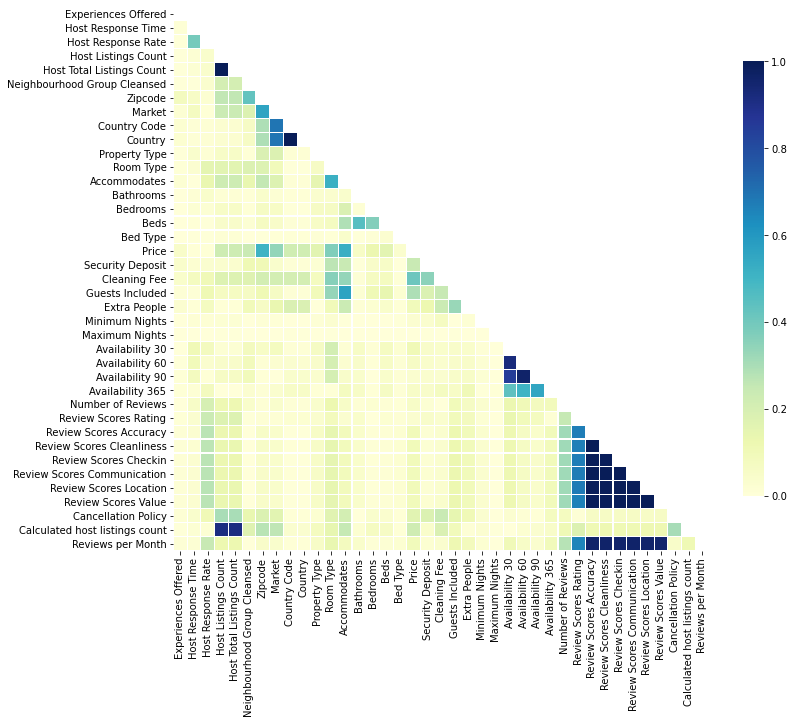

In [16]:
#Ahora vamos a echar un vistazo a la matriz de correlacion para deshacernos de variables con alta dependencia lineal

import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train.corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()


In [17]:
#Nos ayudamos de grafico y tabla para detectar mejor aquellos que tienen una correlacion mayor al 85%
#Vamos a considerar alta dependencia lineal a aquellas caracteristica que tengan un valor mayor a 0.85
corr>0.85

,Experiences Offered,Host Response Time,Host Response Rate,Host Listings Count,Host Total Listings Count,Neighbourhood Group Cleansed,Zipcode,Market,Country Code,Country,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
Experiences Offered,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Host Response Time,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Host Response Rate,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Host Listings Count,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Host Total Listings Count,False,False,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
Neighbourhood Group Cleansed,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Zipcode,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Market,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
Country Code,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
Country,False,False,False,False,False,False,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False


In [18]:
#Hacemos zoom en la region baja de la tabla, donde parece haber alta correlación, para sí ver mejor
df_train.iloc[:,33:].corr()>0.85

,Review Scores Communication,Review Scores Location,Review Scores Value,Cancellation Policy,Calculated host listings count,Reviews per Month
Review Scores Communication,True,True,True,False,False,True
Review Scores Location,True,True,True,False,False,True
Review Scores Value,True,True,True,False,False,True
Cancellation Policy,False,False,False,True,False,False
Calculated host listings count,False,False,False,False,True,False
Reviews per Month,True,True,True,False,False,True


In [19]:
# Nos desacemos de todas aquellas variables que tienen una altacorrelacion entre si y nos quedamos solo con una de cada
size_train = df_train.shape[1]
df_train = df_train.drop(columns=["Review Scores Cleanliness","Review Scores Checkin","Review Scores Accuracy", "Review Scores Location", "Review Scores Communication", "Reviews per Month","Country","Availability 60", "Availability 90", "Calculated host listings count","Host Total Listings Count"])
print(f"En valor absoluto hemos quitado {size_train-df_train.shape[1]} columnas de {size_train} quedando así {df_train.shape[1]} columnas")
print(f"En valor relativo hemos quitado un {round((size_train-df_train.shape[1])*100/size_train,2)} % de las columnas")

En valor absoluto hemos quitado 11 columnas de 39 quedando así 28 columnas
En valor relativo hemos quitado un 28.21 % de las columnas


Text(0.5, 0, 'Price')

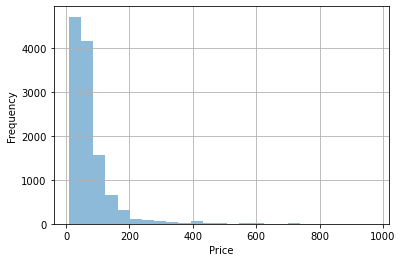

In [20]:
#Observamos outliers en el precio para intentar descartar columnas poco representativas
df_train['Price'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Price')

In [21]:
len(df_train[df_train['Price']>200])/len(df_train)

0.03924221921515562

In [22]:
#Nos deshacemos de las columnas con precios mayores a 400
df_train = df_train[df_train['Price'] < 200]

In [23]:
df_train.describe()

,Experiences Offered,Host Response Time,Host Response Rate,Host Listings Count,Neighbourhood Group Cleansed,Zipcode,Market,Country Code,Property Type,Room Type,...,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Value,Cancellation Policy
count,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,...,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000,11300.000000
mean,73.675704,73.908540,92.152995,11.511074,69.017948,70.803439,72.394246,73.307714,73.398146,73.131498,...,1.537257,7.556460,2.995664,965.413628,8.707257,201.419381,23.255752,87.745725,23.255455,73.411833
std,3.221996,0.643360,15.825841,32.438017,15.884778,26.110841,19.989808,11.181569,10.839068,26.773923,...,1.005838,11.838026,13.199521,9602.365428,9.153583,128.404134,38.542571,10.910837,26.631831,11.664803
min,42.333333,73.135867,0.000000,0.000000,20.000000,18.000000,27.250000,29.000000,20.500000,31.320988,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,2.000000,64.194133
25%,73.606698,73.712458,90.000000,1.000000,70.059155,61.730689,67.745030,71.789869,72.294431,40.894831,...,1.000000,0.000000,1.000000,360.000000,0.000000,77.000000,1.000000,76.000000,9.000000,64.194133
50%,73.606698,73.856443,100.000000,2.000000,72.889134,67.780488,67.745030,71.789869,72.294431,95.101560,...,1.000000,0.000000,2.000000,1125.000000,6.000000,239.000000,7.000000,91.000000,10.000000,65.076832
75%,73.606698,73.856443,100.000000,5.000000,72.889134,77.422078,67.745030,71.789869,72.294431,95.101560,...,2.000000,14.000000,3.000000,1125.000000,14.000000,319.000000,28.000000,97.000000,10.000000,86.974488
max,219.500000,75.689076,100.000000,519.000000,174.818182,412.500000,521.555556,509.100000,296.769231,95.101560,...,16.000000,500.000000,1125.000000,1000000.000000,30.000000,365.000000,356.000000,100.000000,73.712458,175.458333


In [24]:
#Ahora estamos listos para crear un modelo
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

#Separamos X de y

from sklearn import preprocessing
data = df_train.values
price_pos = df_train.columns.get_loc("Price")
y_train = data[:,price_pos]     # nos quedamos con la 1ª columna, price
X_train = data[:,0:]     # nos quedamos con el resto
X_train = np.delete(X_train, price_pos, 1)
feature_names = df_train.columns[0:].drop("Price")
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [25]:
feature_names

Index(['Experiences Offered', 'Host Response Time', 'Host Response Rate',
       'Host Listings Count', 'Neighbourhood Group Cleansed', 'Zipcode',
       'Market', 'Country Code', 'Property Type', 'Room Type', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Bed Type', 'Security Deposit',
       'Cleaning Fee', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Maximum Nights', 'Availability 30', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Value',
       'Cancellation Policy'],
      dtype='object')

In [26]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
import statistics as st

In [27]:
#Hacemos seleccion de caracteristicas fijandonos en el mse y con el metodo de seleccion hacia delante
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

feature_ranking =[]
mse =[]
mse_list=[]
for j in range(X_train.shape[1]):
    #if j == 1:
     #   break
    
    best_score = 100000
    score=[]
    for i in range(X_train.shape[1]):
      #  if i ==1:
       #     break
            
        reg = KFold(n_splits=5, shuffle = True)
        mse = []
        for train, validation in reg.split(X_train):

            if i in feature_ranking:
                a = True
                break
                
            if j == 0:

                X_val = X_train[validation,i].reshape(-1,1) 
                X_CV = X_train[train,i].reshape(-1,1)
                a =False
                
            if j>0:
                a=False

                idx = feature_ranking
                
                X_CV = np.concatenate((X_train[train,i].reshape(-1,1), X_train[np.ix_(train,idx)].reshape(len(train),len(idx))),axis=1)
                X_val = np.concatenate((X_train[validation,i].reshape(-1,1), X_train[np.ix_(validation,idx)].reshape(len(validation),len(idx))),axis=1) 
                
            y_val = y_train[validation].reshape(-1,1)
            y_CV= y_train[train].reshape(-1,1)     
  
            LR = LinearRegression().fit(X_CV,y_CV)
            y_hat = LR.predict(X_val)
            mse.append(np.mean((y_val.reshape(-1,1)-y_hat)**2))
            
            #printsss
            print(df_train.columns[i])
            print(f"y_hat={y_hat}")
            print(f"y_val={y_val}")
            print(mse)
            
         
        if a == True:
            continue
        else:    
            score.append(st.mean(mse))
            print(score)
            print("\n")
        
        if score[-1] < best_score-1:
            best_feature = i
            best_score = score[-1]
        
     
    feature_ranking.append(best_feature)
    mse_list.append(best_score)

Experiences Offered
y_hat=[[61.77039983]
 [61.77039983]
 [61.77039983]
 ...
 [61.77039983]
 [61.77039983]
 [61.77039983]]
y_val=[[10.]
 [32.]
 [65.]
 ...
 [36.]
 [41.]
 [48.]]
[1474.1109498612286]
Experiences Offered
y_hat=[[62.00315455]
 [62.00315455]
 [62.00315455]
 ...
 [62.00315455]
 [62.00315455]
 [62.00315455]]
y_val=[[80.]
 [50.]
 [50.]
 ...
 [95.]
 [45.]
 [50.]]
[1474.1109498612286, 1440.485316181747]
Experiences Offered
y_hat=[[62.19939085]
 [62.19939085]
 [62.19939085]
 ...
 [62.19939085]
 [62.19939085]
 [62.19939085]]
y_val=[[85.]
 [39.]
 [29.]
 ...
 [45.]
 [69.]
 [69.]]
[1474.1109498612286, 1440.485316181747, 1416.9583822318807]
Experiences Offered
y_hat=[[62.18359421]
 [62.18359421]
 [62.18359421]
 ...
 [62.18359421]
 [62.18359421]
 [62.18359421]]
y_val=[[ 50.]
 [ 30.]
 [ 35.]
 ...
 [120.]
 [ 55.]
 [ 25.]]
[1474.1109498612286, 1440.485316181747, 1416.9583822318807, 1378.2078458749988]
Experiences Offered
y_hat=[[62.33233215]
 [62.33233215]
 [62.33233215]
 ...
 [62.33233215

Maximum Nights
y_hat=[[60.88412188]
 [63.05322328]
 [62.8466422 ]
 ...
 [62.64006111]
 [62.02031785]
 [61.60715568]]
y_val=[[ 35.]
 [ 25.]
 [ 55.]
 ...
 [120.]
 [ 69.]
 [ 69.]]
[1457.3036706538787]
Maximum Nights
y_hat=[[60.79084264]
 [62.44103821]
 [62.8535871 ]
 ...
 [60.68770542]
 [62.8535871 ]
 [62.64731265]]
y_val=[[52.]
 [39.]
 [50.]
 ...
 [45.]
 [50.]
 [52.]]
[1457.3036706538787, 1456.8647545646809]
Maximum Nights
y_hat=[[62.03872258]
 [61.09383927]
 [60.97572885]
 ...
 [59.6765143 ]
 [62.15683299]
 [62.51116423]]
y_val=[[ 32.]
 [ 80.]
 [158.]
 ...
 [ 30.]
 [ 95.]
 [ 45.]]
[1457.3036706538787, 1456.8647545646809, 1423.3118538641136]
Maximum Nights
y_hat=[[63.16431596]
 [61.80191243]
 [62.4831142 ]
 ...
 [63.16431596]
 [62.38579966]
 [63.16431596]]
y_val=[[30.]
 [29.]
 [65.]
 ...
 [14.]
 [29.]
 [15.]]
[1457.3036706538787, 1456.8647545646809, 1423.3118538641136, 1378.2685754750885]
Maximum Nights
y_hat=[[62.28254528]
 [61.48071079]
 [61.61434987]
 ...
 [63.48529703]
 [62.81710161]

[892.4766535082057, 843.8660496356392, 822.0384468856297, 927.2779745382445, 844.552848387422]
[877.789898169681, 877.3382016494936, 876.8379070538057, 840.0152902202536, 825.4959502032209, 770.9364439256804, 835.6602015712036, 873.2419224833387, 874.1492531214608, 732.0287761144217, 873.4921342043782, 871.6558124345083, 866.0423945910283]


Bed Type
y_hat=[[81.20252704]
 [33.9716441 ]
 [33.9716441 ]
 ...
 [81.20252704]
 [81.20252704]
 [81.20252704]]
y_val=[[60.]
 [32.]
 [25.]
 ...
 [45.]
 [52.]
 [55.]]
[888.2611436660549]
Bed Type
y_hat=[[81.47551685]
 [81.47551685]
 [71.97047167]
 ...
 [34.4022126 ]
 [34.4022126 ]
 [81.47551685]]
y_val=[[69.]
 [52.]
 [55.]
 ...
 [29.]
 [15.]
 [40.]]
[888.2611436660549, 858.3827417729711]
Bed Type
y_hat=[[81.40831658]
 [26.18551316]
 [81.40831658]
 ...
 [81.40831658]
 [34.47478449]
 [34.47478449]]
y_val=[[ 50.]
 [ 10.]
 [158.]
 ...
 [ 90.]
 [ 29.]
 [ 25.]]
[888.2611436660549, 858.3827417729711, 888.8767223911111]
Bed Type
y_hat=[[34.24206107]
 [81.769

y_hat=[[37.99953763]
 [65.90179024]
 [44.50383114]
 ...
 [61.16022947]
 [82.55818857]
 [36.42423595]]
y_val=[[32.]
 [52.]
 [50.]
 ...
 [45.]
 [70.]
 [25.]]
[680.0205273285761, 679.3939158715093, 663.3579134076558, 699.244698577549]
Neighbourhood Group Cleansed
y_hat=[[81.17502704]
 [30.11610403]
 [23.80834272]
 ...
 [82.38466121]
 [70.97671113]
 [78.72693881]]
y_val=[[60.]
 [35.]
 [35.]
 ...
 [95.]
 [50.]
 [52.]]
[680.0205273285761, 679.3939158715093, 663.3579134076558, 699.244698577549, 701.1202460767126]
[731.3975832527151, 730.3328528027185, 726.585630818007, 709.0675191335237, 684.6274602524006]


Zipcode
y_hat=[[58.69646675]
 [47.07815879]
 [64.48508141]
 ...
 [79.01845366]
 [79.01845366]
 [64.56153234]]
y_val=[[85.]
 [50.]
 [29.]
 ...
 [40.]
 [45.]
 [69.]]
[644.02284805988]
Zipcode
y_hat=[[33.59065705]
 [40.9366861 ]
 [35.70442237]
 ...
 [77.87659894]
 [40.9366861 ]
 [63.66905667]]
y_val=[[32.]
 [25.]
 [29.]
 ...
 [85.]
 [29.]
 [50.]]
[644.02284805988, 561.1872739078212]
Zipcode


Availability 30
y_hat=[[35.50745234]
 [81.09969135]
 [82.94289394]
 ...
 [26.44077104]
 [82.75438458]
 [27.96280954]]
y_val=[[32.]
 [80.]
 [69.]
 ...
 [15.]
 [95.]
 [25.]]
[752.7463536288665, 749.7557059504758, 714.6316258324034, 686.1224636796929]
Availability 30
y_hat=[[34.09238892]
 [80.40103358]
 [36.23628493]
 ...
 [35.61006101]
 [63.95695793]
 [73.40934157]]
y_val=[[ 25.]
 [158.]
 [ 35.]
 ...
 [ 29.]
 [ 50.]
 [ 52.]]
[752.7463536288665, 749.7557059504758, 714.6316258324034, 686.1224636796929, 750.9446357648412]
[731.3975832527151, 730.3328528027185, 726.585630818007, 709.0675191335237, 684.6274602524006, 645.4133272810118, 703.4593743509625, 727.9450220902633, 730.3958897162642, 729.1652443809619, 730.3702462612608, 731.4571953649677, 730.2732284155636, 705.6492007746629, 696.9166520665234, 728.0350957090598, 731.3442729727586, 731.6879858701135, 732.1452812029643, 720.8815907918521, 730.840156971256]


Availability 365
y_hat=[[22.24167081]
 [36.00999372]
 [23.94009618]
 ...
 [81

Beds
y_hat=[[ 84.7566963 ]
 [ 78.96052317]
 [ 78.72718569]
 ...
 [ 40.789133  ]
 [ 58.13422425]
 [111.95143485]]
y_val=[[60.]
 [80.]
 [55.]
 ...
 [29.]
 [15.]
 [45.]]
[653.9159857371487, 645.1439449495745, 645.7666751728611, 651.5025462160979, 629.1650849202881]
[645.8021335850126, 644.9062835432159, 640.5041378608387, 638.3820126363565, 640.3528762918667, 643.5258361587811, 644.1675264314952, 645.2204973014349, 644.2314636879162, 644.2245000687883, 645.098847399194]


Bed Type
y_hat=[[59.19050136]
 [68.79049924]
 [79.40204295]
 ...
 [38.26079746]
 [54.08529721]
 [48.98119913]]
y_val=[[85.]
 [52.]
 [65.]
 ...
 [29.]
 [30.]
 [25.]]
[641.2272134542608]
Bed Type
y_hat=[[ 74.10134165]
 [ 36.29501031]
 [ 81.27902768]
 ...
 [ 58.23465639]
 [ 77.84236473]
 [114.42420846]]
y_val=[[ 70.]
 [ 25.]
 [130.]
 ...
 [ 14.]
 [ 85.]
 [ 45.]]
[641.2272134542608, 651.1009977690233]
Bed Type
y_hat=[[35.85836273]
 [79.22660912]
 [41.14668678]
 ...
 [79.1516685 ]
 [70.57523936]
 [70.041873  ]]
y_val=[[30.]
 

Host Response Time
y_hat=[[ 83.09903756]
 [ 61.84707295]
 [ 79.71395378]
 ...
 [ 80.00494299]
 [ 17.60055563]
 [108.69542927]]
y_val=[[60.]
 [52.]
 [55.]
 ...
 [95.]
 [16.]
 [45.]]
[581.3060930130725, 612.8007889798645, 651.5068909848729, 680.7051929777881]
Host Response Time
y_hat=[[119.73444694]
 [ 24.23924536]
 [ 68.89700829]
 ...
 [ 58.42052909]
 [ 83.34692421]
 [ 69.43662575]]
y_val=[[158.]
 [ 35.]
 [ 70.]
 ...
 [ 30.]
 [ 95.]
 [ 52.]]
[581.3060930130725, 612.8007889798645, 651.5068909848729, 680.7051929777881, 581.3842852270332]
[621.6485585069746, 621.5406502365263]


Host Response Rate
y_hat=[[32.39467045]
 [33.53505963]
 [78.17681629]
 ...
 [57.22038649]
 [57.09583237]
 [81.84119989]]
y_val=[[30.]
 [39.]
 [65.]
 ...
 [15.]
 [30.]
 [95.]]
[608.0968904065824]
Host Response Rate
y_hat=[[120.10599978]
 [ 62.44097967]
 [ 80.70449821]
 ...
 [ 72.13745428]
 [ 68.17978099]
 [ 71.60575717]]
y_val=[[158.]
 [ 52.]
 [ 55.]
 ...
 [ 50.]
 [ 52.]
 [ 69.]]
[608.0968904065824, 607.543803091917

Minimum Nights
y_hat=[[84.71050246]
 [31.9797895 ]
 [44.34974993]
 ...
 [73.76383472]
 [79.09077849]
 [71.91437937]]
y_val=[[60.]
 [32.]
 [50.]
 ...
 [71.]
 [70.]
 [69.]]
[637.9176709214945]
Minimum Nights
y_hat=[[76.65919095]
 [54.26559455]
 [23.99285412]
 ...
 [81.4132579 ]
 [65.79041021]
 [47.23595764]]
y_val=[[50.]
 [85.]
 [35.]
 ...
 [55.]
 [69.]
 [25.]]
[637.9176709214945, 598.3928791296375]
Minimum Nights
y_hat=[[ 27.3263957 ]
 [ 77.21467778]
 [113.1499752 ]
 ...
 [ 49.88605123]
 [ 55.12665496]
 [ 72.30043993]]
y_val=[[35.]
 [80.]
 [69.]
 ...
 [41.]
 [15.]
 [40.]]
[637.9176709214945, 598.3928791296375, 661.0218454080762]
Minimum Nights
y_hat=[[ 13.9415539 ]
 [ 34.23453252]
 [ 79.52596308]
 ...
 [104.03386492]
 [ 79.44459071]
 [ 68.32524938]]
y_val=[[ 10.]
 [ 30.]
 [ 65.]
 ...
 [120.]
 [ 45.]
 [ 50.]]
[637.9176709214945, 598.3928791296375, 661.0218454080762, 607.2706531699724]
Minimum Nights
y_hat=[[ 42.40822399]
 [115.43654873]
 [ 34.30826889]
 ...
 [ 42.63618614]
 [ 82.29090547

Bathrooms
y_hat=[[ 74.29485171]
 [ 33.77343774]
 [ 26.84645677]
 ...
 [112.83227407]
 [ 83.99004481]
 [ 63.31791128]]
y_val=[[ 50.]
 [ 30.]
 [ 35.]
 ...
 [120.]
 [ 55.]
 [ 69.]]
[627.4325300975767]
Bathrooms
y_hat=[[ 13.17020583]
 [ 31.30355842]
 [ 78.76310424]
 ...
 [107.22360405]
 [ 77.58468913]
 [ 46.61742688]]
y_val=[[10.]
 [32.]
 [65.]
 ...
 [45.]
 [45.]
 [25.]]
[627.4325300975767, 603.9893019561754]
Bathrooms
y_hat=[[110.91942369]
 [ 75.31610192]
 [ 47.63324976]
 ...
 [ 72.15937539]
 [ 56.74393235]
 [ 63.5786551 ]]
y_val=[[69.]
 [55.]
 [35.]
 ...
 [40.]
 [30.]
 [50.]]
[627.4325300975767, 603.9893019561754, 588.7149343023137]
Bathrooms
y_hat=[[ 81.71780857]
 [ 85.05998396]
 [105.40860179]
 ...
 [ 77.57054105]
 [ 66.85534933]
 [ 68.88911691]]
y_val=[[ 60.]
 [ 80.]
 [158.]
 ...
 [ 85.]
 [ 52.]
 [ 69.]]
[627.4325300975767, 603.9893019561754, 588.7149343023137, 600.0120537820123]
Bathrooms
y_hat=[[41.91473956]
 [43.39947328]
 [98.72916602]
 ...
 [76.33758331]
 [84.6942311 ]
 [82.76225

Experiences Offered
y_hat=[[29.34434901]
 [73.6934616 ]
 [69.68566166]
 ...
 [18.04443211]
 [15.21941719]
 [80.94884699]]
y_val=[[ 32.]
 [ 55.]
 [160.]
 ...
 [ 24.]
 [ 16.]
 [ 95.]]
[581.4876807906329, 638.2785595344526]
Experiences Offered
y_hat=[[81.05983936]
 [18.86665497]
 [59.82807167]
 ...
 [76.69666544]
 [83.83046066]
 [43.28541479]]
y_val=[[60.]
 [10.]
 [85.]
 ...
 [45.]
 [55.]
 [25.]]
[581.4876807906329, 638.2785595344526, 588.9402733753575]
Experiences Offered
y_hat=[[73.69792046]
 [83.12516284]
 [47.14628836]
 ...
 [61.31381178]
 [63.61182918]
 [68.28952067]]
y_val=[[50.]
 [80.]
 [25.]
 ...
 [15.]
 [30.]
 [69.]]
[581.4876807906329, 638.2785595344526, 588.9402733753575, 580.9386331947998]
Experiences Offered
y_hat=[[ 39.47403347]
 [102.22662645]
 [ 30.61153089]
 ...
 [112.18999831]
 [ 70.97517586]
 [ 72.9756732 ]]
y_val=[[ 30.]
 [158.]
 [ 25.]
 ...
 [120.]
 [ 40.]
 [ 52.]]
[581.4876807906329, 638.2785595344526, 588.9402733753575, 580.9386331947998, 618.5436294640247]
[601.637

Guests Included
y_hat=[[81.76110558]
 [31.50879575]
 [50.01513553]
 ...
 [71.35421181]
 [62.7056702 ]
 [43.67473818]]
y_val=[[60.]
 [39.]
 [50.]
 ...
 [40.]
 [69.]
 [25.]]
[535.481576369183, 604.7502934152387, 602.3202953470059, 630.517712161276, 618.143978032357]
[601.6377552718535, 599.6555068422379, 597.7364132883074, 594.9545910723193, 596.3782470635032, 602.4351863087926, 600.2825531371964, 600.1888067021546, 599.0474969532686, 599.370876900863, 599.5288101562763, 599.0839710294129, 596.9967666397444, 598.2427710650121]


Extra People
y_hat=[[29.43293291]
 [68.88218591]
 [74.40771153]
 ...
 [76.67316314]
 [71.23331954]
 [73.51821416]]
y_val=[[32.]
 [52.]
 [55.]
 ...
 [45.]
 [50.]
 [52.]]
[612.5502563614803]
Extra People
y_hat=[[ 39.12081978]
 [ 24.55395036]
 [110.39838617]
 ...
 [ 76.65639486]
 [ 39.15506243]
 [ 59.71751188]]
y_val=[[30.]
 [35.]
 [69.]
 ...
 [85.]
 [29.]
 [15.]]
[612.5502563614803, 594.7659813655033]
Extra People
y_hat=[[60.60929515]
 [21.84547216]
 [44.9521854 ]


Country Code
y_hat=[[ 81.79171152]
 [ 18.75040204]
 [ 70.46412257]
 ...
 [ 78.97225545]
 [114.91285688]
 [ 39.44861573]]
y_val=[[ 60.]
 [ 10.]
 [160.]
 ...
 [ 95.]
 [ 45.]
 [ 25.]]
[567.9088514653458, 595.9682650918069, 591.8955001051386, 616.3656403708997]
Country Code
y_hat=[[73.5610603 ]
 [38.84271526]
 [45.76560939]
 ...
 [82.8072217 ]
 [67.68621444]
 [63.56933343]]
y_val=[[50.]
 [30.]
 [25.]
 ...
 [55.]
 [69.]
 [69.]]
[567.9088514653458, 595.9682650918069, 591.8955001051386, 616.3656403708997, 601.635260250377]
[594.5006264194815, 593.3558589433281, 589.8188734721801, 587.0454421841297, 588.2827643506453, 592.5685374274976, 594.7547034567136]


Property Type
y_hat=[[ 81.77784397]
 [ 19.15825578]
 [112.09934834]
 ...
 [ 58.18471003]
 [ 78.87347362]
 [ 75.66546246]]
y_val=[[60.]
 [10.]
 [69.]
 ...
 [15.]
 [95.]
 [45.]]
[614.8801790560078]
Property Type
y_hat=[[112.75174426]
 [ 26.80791305]
 [ 41.47546088]
 ...
 [ 16.06563451]
 [ 41.84543028]
 [ 62.74574606]]
y_val=[[158.]
 [ 14.]
 [

Availability 365
y_hat=[[ 24.80809296]
 [115.86290221]
 [115.44919238]
 ...
 [ 46.7926132 ]
 [ 64.34671631]
 [ 43.66664742]]
y_val=[[ 35.]
 [ 69.]
 [158.]
 ...
 [ 41.]
 [ 14.]
 [ 29.]]
[637.304604822445]
Availability 365
y_hat=[[ 74.32634575]
 [ 38.76024114]
 [ 25.0047994 ]
 ...
 [113.93796653]
 [ 73.48535248]
 [ 42.4601643 ]]
y_val=[[ 50.]
 [ 30.]
 [ 32.]
 ...
 [120.]
 [ 52.]
 [ 25.]]
[637.304604822445, 569.0533045944412]
Availability 365
y_hat=[[18.93707458]
 [60.39104893]
 [37.35348658]
 ...
 [73.52571135]
 [62.90833507]
 [65.04608951]]
y_val=[[10.]
 [85.]
 [60.]
 ...
 [40.]
 [30.]
 [69.]]
[637.304604822445, 569.0533045944412, 583.6297344637501]
Availability 365
y_hat=[[27.73090963]
 [30.30351176]
 [79.24049429]
 ...
 [74.12415627]
 [70.19532495]
 [81.20483896]]
y_val=[[14.]
 [25.]
 [45.]
 ...
 [45.]
 [50.]
 [55.]]
[637.304604822445, 569.0533045944412, 583.6297344637501, 580.40708094817]
Availability 365
y_hat=[[ 83.36136589]
 [ 85.27757552]
 [ 46.20058956]
 ...
 [ 78.1531528 ]
 [11

Beds
y_hat=[[75.71678212]
 [28.1752831 ]
 [29.80547542]
 ...
 [46.03533475]
 [68.28397131]
 [39.37050416]]
y_val=[[50.]
 [32.]
 [35.]
 ...
 [41.]
 [90.]
 [25.]]
[590.2143200426694, 564.7125240894737, 594.8639715851829]
Beds
y_hat=[[114.74168208]
 [ 69.91913703]
 [ 68.43920742]
 ...
 [ 54.11421033]
 [ 78.66440764]
 [ 74.45779073]]
y_val=[[158.]
 [ 55.]
 [ 70.]
 ...
 [ 15.]
 [ 95.]
 [ 45.]]
[590.2143200426694, 564.7125240894737, 594.8639715851829, 551.9985328760657]
Beds
y_hat=[[82.45196984]
 [42.34166024]
 [59.13780176]
 ...
 [71.9612906 ]
 [82.1968116 ]
 [69.56161858]]
y_val=[[60.]
 [25.]
 [85.]
 ...
 [52.]
 [55.]
 [69.]]
[590.2143200426694, 564.7125240894737, 594.8639715851829, 551.9985328760657, 623.6997363405942]
[584.5140455431664, 584.5967023654939, 582.5684521457108, 577.7811638003516, 579.6535561547548, 586.6746191438524, 585.5828382489478, 585.629454307911, 583.4094887067799, 585.9069220810018, 585.0978169867972]


Bed Type
y_hat=[[ 34.70975329]
 [ 88.24993187]
 [118.82494203]


Host Response Rate
y_hat=[[120.66848819]
 [ 60.24415843]
 [ 36.6645002 ]
 ...
 [ 82.37758617]
 [ 76.90173695]
 [ 68.65433019]]
y_val=[[69.]
 [29.]
 [25.]
 ...
 [75.]
 [95.]
 [50.]]
[585.7158289565439, 547.0392580594715, 601.593190384838, 584.9250502473054, 560.0660674934215]
[578.1081249455252, 578.0589446535123, 575.8678790283161]


Neighbourhood Group Cleansed
y_hat=[[44.64454574]
 [72.05997901]
 [69.45625448]
 ...
 [69.92755259]
 [68.33523477]
 [39.23554959]]
y_val=[[30.]
 [52.]
 [55.]
 ...
 [45.]
 [69.]
 [25.]]
[559.9906121132067]
Neighbourhood Group Cleansed
y_hat=[[ 89.30186131]
 [116.03294651]
 [ 61.99751755]
 ...
 [ 61.65503645]
 [115.12246469]
 [ 77.21677631]]
y_val=[[80.]
 [69.]
 [85.]
 ...
 [14.]
 [45.]
 [55.]]
[559.9906121132067, 559.9871511139494]
Neighbourhood Group Cleansed
y_hat=[[ 29.51356872]
 [116.02504272]
 [ 33.18788009]
 ...
 [ 69.12745171]
 [ 71.68599376]
 [ 67.83048018]]
y_val=[[ 32.]
 [158.]
 [ 29.]
 ...
 [ 50.]
 [ 52.]
 [ 69.]]
[559.9906121132067, 559.98715111

Minimum Nights
y_hat=[[ 60.49731603]
 [ 23.08496135]
 [ 38.73403296]
 ...
 [117.19918264]
 [ 69.90497386]
 [ 66.38750611]]
y_val=[[29.]
 [35.]
 [25.]
 ...
 [45.]
 [52.]
 [69.]]
[548.4040585026438, 587.4769473840907, 613.5221813594783, 574.351899605408, 588.8645986896021]
[578.1081249455252, 578.0589446535123, 575.8678790283161, 574.7614537398143, 579.653855233465, 574.8267748063139, 579.8838230708803, 577.3111538825704, 579.2406345225701, 578.3042062119898, 578.2557098114559, 575.6135015207408, 577.6710627467348, 577.8218011072267, 582.5239371082446]


Availability 30
y_hat=[[75.49563708]
 [19.89454028]
 [27.99332857]
 ...
 [84.32855559]
 [21.97817639]
 [69.96592214]]
y_val=[[50.]
 [10.]
 [32.]
 ...
 [95.]
 [16.]
 [40.]]
[581.1667341518139]
Availability 30
y_hat=[[109.39784986]
 [ 43.61593408]
 [ 71.88336336]
 ...
 [ 64.14165837]
 [ 73.50048456]
 [ 68.34160383]]
y_val=[[158.]
 [ 50.]
 [160.]
 ...
 [ 30.]
 [ 45.]
 [ 69.]]
[581.1667341518139, 600.9396512429574]
Availability 30
y_hat=[[ 8

Beds
y_hat=[[18.30824362]
 [29.40624814]
 [31.48400971]
 ...
 [76.59853624]
 [70.41782946]
 [39.44909629]]
y_val=[[10.]
 [32.]
 [35.]
 ...
 [85.]
 [40.]
 [25.]]
[550.9929491347361, 576.9843429679736]
Beds
y_hat=[[76.59119219]
 [42.28345105]
 [61.48784225]
 ...
 [52.4252076 ]
 [78.78845992]
 [70.37217903]]
y_val=[[50.]
 [30.]
 [85.]
 ...
 [15.]
 [95.]
 [50.]]
[550.9929491347361, 576.9843429679736, 555.7527059202855]
Beds
y_hat=[[ 68.71627371]
 [ 34.45400139]
 [ 60.5500444 ]
 ...
 [110.96756102]
 [ 63.3837049 ]
 [ 69.58192595]]
y_val=[[ 55.]
 [ 39.]
 [ 29.]
 ...
 [120.]
 [ 30.]
 [ 45.]]
[550.9929491347361, 576.9843429679736, 555.7527059202855, 600.5087740487165]
Beds
y_hat=[[ 80.85766945]
 [ 33.33217745]
 [ 22.12477833]
 ...
 [ 18.52748774]
 [115.8829826 ]
 [ 68.63801781]]
y_val=[[60.]
 [29.]
 [14.]
 ...
 [16.]
 [45.]
 [69.]]
[550.9929491347361, 576.9843429679736, 555.7527059202855, 600.5087740487165, 588.6855211266873]
[573.341106924295, 573.3938966764547, 570.8010626225617, 574.0237060

Market
y_hat=[[ 71.27789239]
 [ 33.93900158]
 [ 60.48517582]
 ...
 [115.45814468]
 [ 71.31772806]
 [ 66.51607273]]
y_val=[[55.]
 [39.]
 [29.]
 ...
 [45.]
 [52.]
 [69.]]
[598.9687828228194, 602.7624937224565, 528.9442524155629]
Market
y_hat=[[ 30.50996507]
 [114.43322127]
 [ 91.89084283]
 ...
 [ 76.65775679]
 [ 69.31777443]
 [ 37.32611161]]
y_val=[[ 35.]
 [158.]
 [ 50.]
 ...
 [ 85.]
 [ 45.]
 [ 25.]]
[598.9687828228194, 602.7624937224565, 528.9442524155629, 551.7181507265028]
Market
y_hat=[[40.4569253 ]
 [87.88198035]
 [76.28716635]
 ...
 [83.6151458 ]
 [47.98486522]
 [70.3100792 ]]
y_val=[[30.]
 [80.]
 [65.]
 ...
 [95.]
 [29.]
 [50.]]
[598.9687828228194, 602.7624937224565, 528.9442524155629, 551.7181507265028, 575.3110600482178]
[571.1674817195716, 571.6748428724095, 571.5409479471119]


Country Code
y_hat=[[108.40315004]
 [ 74.08809085]
 [ 72.36866656]
 ...
 [109.77730093]
 [ 59.97248066]
 [ 77.09542933]]
y_val=[[158.]
 [ 52.]
 [160.]
 ...
 [120.]
 [ 30.]
 [ 55.]]
[576.2794433609557]
C

Availability 30
y_hat=[[47.71090704]
 [32.90200776]
 [71.11878649]
 ...
 [54.38565894]
 [62.47372114]
 [70.76990999]]
y_val=[[25.]
 [29.]
 [55.]
 ...
 [35.]
 [41.]
 [52.]]
[533.2252793389351, 592.5695754319652, 623.5929396235285, 538.5033294225559]
Availability 30
y_hat=[[ 28.67849508]
 [111.41237622]
 [ 61.03926313]
 ...
 [ 48.8611724 ]
 [116.01374751]
 [ 69.59007502]]
y_val=[[ 32.]
 [158.]
 [ 85.]
 ...
 [ 29.]
 [ 45.]
 [ 50.]]
[533.2252793389351, 592.5695754319652, 623.5929396235285, 538.5033294225559, 573.428453388076]
[571.1674817195716, 571.6748428724095, 571.5409479471119, 568.6821326639658, 571.9564325993094, 570.8721098231273, 570.452726220117, 570.5026185972984, 572.4037327220212, 567.6704881386848, 568.4096727713184, 571.3574205146016, 577.4035217624426, 572.2639154410122]


Availability 365
y_hat=[[76.88095957]
 [16.14531006]
 [32.23379273]
 ...
 [84.75026937]
 [62.71243684]
 [71.93414558]]
y_val=[[50.]
 [10.]
 [29.]
 ...
 [95.]
 [14.]
 [52.]]
[572.4707899392805]
Availabilit

Bed Type
y_hat=[[ 41.61172823]
 [ 28.16572325]
 [ 30.74264052]
 ...
 [111.49421733]
 [ 69.58853558]
 [ 72.63685011]]
y_val=[[30.]
 [32.]
 [35.]
 ...
 [45.]
 [45.]
 [50.]]
[560.2594085318502]
Bed Type
y_hat=[[73.84645015]
 [47.89385369]
 [33.47422841]
 ...
 [17.39914255]
 [69.5231654 ]
 [65.78698819]]
y_val=[[50.]
 [25.]
 [39.]
 ...
 [16.]
 [69.]
 [69.]]
[560.2594085318502, 529.1064327339162]
Bed Type
y_hat=[[78.72816738]
 [32.70157421]
 [63.94150242]
 ...
 [55.73777238]
 [82.73154717]
 [39.26393702]]
y_val=[[60.]
 [29.]
 [70.]
 ...
 [15.]
 [55.]
 [25.]]
[560.2594085318502, 529.1064327339162, 569.7007701285132]
Bed Type
y_hat=[[16.15402135]
 [76.64309917]
 [90.58819264]
 ...
 [38.98584554]
 [58.8120393 ]
 [69.79649457]]
y_val=[[10.]
 [65.]
 [50.]
 ...
 [40.]
 [48.]
 [52.]]
[560.2594085318502, 529.1064327339162, 569.7007701285132, 595.4915540220171]
Bed Type
y_hat=[[ 88.62246639]
 [121.25051333]
 [ 60.62241985]
 ...
 [ 81.0413956 ]
 [ 70.89078337]
 [ 61.33605498]]
y_val=[[80.]
 [69.]
 [8

Property Type
y_hat=[[ 28.19005596]
 [ 30.98016297]
 [ 32.0237188 ]
 ...
 [113.07587413]
 [ 60.19236095]
 [ 69.19005751]]
y_val=[[ 32.]
 [ 35.]
 [ 29.]
 ...
 [120.]
 [ 30.]
 [ 45.]]
[567.4117895681084]
Property Type
y_hat=[[ 15.82611647]
 [118.00264011]
 [ 70.91488211]
 ...
 [ 39.11212862]
 [111.36168955]
 [ 68.98283668]]
y_val=[[ 10.]
 [ 69.]
 [160.]
 ...
 [ 29.]
 [ 45.]
 [ 69.]]
[567.4117895681084, 547.4317510277103]
Property Type
y_hat=[[78.03907645]
 [49.53936102]
 [75.96728978]
 ...
 [82.91614656]
 [65.7826693 ]
 [36.17818796]]
y_val=[[60.]
 [25.]
 [65.]
 ...
 [55.]
 [69.]
 [25.]]
[567.4117895681084, 547.4317510277103, 607.7594946123551]
Property Type
y_hat=[[ 73.39963484]
 [ 41.95422445]
 [ 88.27685572]
 ...
 [ 38.09611825]
 [117.7985539 ]
 [ 47.26983415]]
y_val=[[ 50.]
 [ 30.]
 [ 80.]
 ...
 [ 40.]
 [170.]
 [ 29.]]
[567.4117895681084, 547.4317510277103, 607.7594946123551, 594.9624398538895]
Property Type
y_hat=[[103.99142064]
 [ 44.19945641]
 [ 20.22104784]
 ...
 [ 54.18883592]
 

Availability 365
y_hat=[[ 88.89566527]
 [ 44.02028241]
 [ 90.7730718 ]
 ...
 [ 77.87473893]
 [113.91543778]
 [ 69.96622661]]
y_val=[[ 80.]
 [ 50.]
 [ 50.]
 ...
 [ 85.]
 [120.]
 [ 52.]]
[542.8981829851376, 557.6030403316703, 559.0303870080728, 573.0813245131319]
Availability 365
y_hat=[[79.04588806]
 [74.22499095]
 [15.69270193]
 ...
 [71.8848703 ]
 [48.28688853]
 [40.54182767]]
y_val=[[60.]
 [50.]
 [10.]
 ...
 [90.]
 [29.]
 [29.]]
[542.8981829851376, 557.6030403316703, 559.0303870080728, 573.0813245131319, 568.5939378924523]
[569.4946669765238, 566.8690949725586, 562.5056600399099, 573.7262814015585, 566.1039957968865, 568.3397342783913, 566.2039420457108, 572.773811273529, 558.5826747988159, 577.274344773067, 565.6393355030311, 566.2284260451977, 560.241374546093]


Review Scores Value
y_hat=[[ 78.68816761]
 [ 59.80863427]
 [ 19.76007612]
 ...
 [112.30326102]
 [ 70.54917728]
 [ 64.00018475]]
y_val=[[60.]
 [29.]
 [35.]
 ...
 [45.]
 [50.]
 [69.]]
[569.3817679849743]
Review Scores Value


Beds
y_hat=[[75.4615709 ]
 [69.77800603]
 [90.99656181]
 ...
 [82.77234606]
 [61.60796139]
 [61.16466685]]
y_val=[[50.]
 [55.]
 [50.]
 ...
 [95.]
 [14.]
 [30.]]
[558.1840110213515, 509.84826243263916, 585.7054580591882]
Beds
y_hat=[[ 17.08757515]
 [ 31.54640366]
 [118.52119923]
 ...
 [105.3079117 ]
 [ 70.43800773]
 [ 69.38724028]]
y_val=[[10.]
 [35.]
 [69.]
 ...
 [45.]
 [50.]
 [52.]]
[558.1840110213515, 509.84826243263916, 585.7054580591882, 607.138786948571]
Beds
y_hat=[[ 44.09329017]
 [ 85.98208803]
 [ 31.20437668]
 ...
 [ 56.28724304]
 [115.37132388]
 [ 40.00262703]]
y_val=[[ 30.]
 [ 80.]
 [ 29.]
 ...
 [ 15.]
 [120.]
 [ 25.]]
[558.1840110213515, 509.84826243263916, 585.7054580591882, 607.138786948571, 546.8885264466544]
[569.1289339770112, 559.510001951999, 561.0319680066123, 561.5470284019823, 563.1265867265242, 560.4609248700308, 561.5530089816808]


Bed Type
y_hat=[[44.24894929]
 [90.57823262]
 [60.28149679]
 ...
 [47.87496763]
 [39.08963208]
 [67.08849197]]
y_val=[[50.]
 [50.]
 

Host Response Time
y_hat=[[ 79.96096133]
 [ 30.18729747]
 [ 54.97865191]
 ...
 [116.62286923]
 [ 75.15445782]
 [105.24874482]]
y_val=[[ 60.]
 [ 29.]
 [ 29.]
 ...
 [120.]
 [ 95.]
 [ 45.]]
[588.8210757671688, 555.6870241902669, 514.4867961406201, 572.0394109196586, 578.8252561832215]
[556.8746532059359, 561.9719126401872]


Market
y_hat=[[81.26202795]
 [50.03096404]
 [20.01106264]
 ...
 [40.66630785]
 [72.37896431]
 [80.11179595]]
y_val=[[60.]
 [25.]
 [14.]
 ...
 [29.]
 [40.]
 [55.]]
[558.474103882008]
Market
y_hat=[[16.54856573]
 [44.34124394]
 [87.24494227]
 ...
 [69.86698753]
 [63.34158878]
 [67.89447272]]
y_val=[[10.]
 [30.]
 [80.]
 ...
 [50.]
 [69.]
 [69.]]
[558.474103882008, 540.3363139331387]
Market
y_hat=[[108.12213445]
 [ 30.7777916 ]
 [ 21.09287898]
 ...
 [116.6431237 ]
 [ 64.07214212]
 [ 69.97359772]]
y_val=[[158.]
 [ 29.]
 [ 35.]
 ...
 [120.]
 [ 45.]
 [ 52.]]
[558.474103882008, 540.3363139331387, 562.455039658006]
Market
y_hat=[[70.32838052]
 [56.02619408]
 [29.95774437]
 ...

Extra People
y_hat=[[79.95622917]
 [43.14477791]
 [87.37352349]
 ...
 [75.480567  ]
 [18.22979085]
 [19.48663747]]
y_val=[[60.]
 [30.]
 [80.]
 ...
 [70.]
 [24.]
 [16.]]
[543.5087370174243, 565.8399271040555, 573.2934477991577, 531.9942447750775, 571.542756565855]
[556.8746532059359, 561.9719126401872, 561.1281461353302, 565.0034886528764, 556.363586650107, 555.3300856899175, 558.414658380237, 555.5149730664567, 557.235822652314]


Minimum Nights
y_hat=[[48.20061785]
 [74.410356  ]
 [70.80151292]
 ...
 [64.50715664]
 [69.96518438]
 [67.57303836]]
y_val=[[ 25.]
 [ 52.]
 [160.]
 ...
 [ 45.]
 [ 50.]
 [ 69.]]
[513.623896675153]
Minimum Nights
y_hat=[[80.13833515]
 [75.77486519]
 [70.25398284]
 ...
 [83.1135953 ]
 [73.67763184]
 [71.07185903]]
y_val=[[60.]
 [50.]
 [55.]
 ...
 [95.]
 [40.]
 [52.]]
[513.623896675153, 541.2246254418286]
Minimum Nights
y_hat=[[108.29906821]
 [ 21.53156179]
 [ 19.75630819]
 ...
 [ 61.92423316]
 [115.98844669]
 [ 75.62171321]]
y_val=[[158.]
 [ 35.]
 [ 14.]
 ...
 [

Property Type
y_hat=[[30.85617567]
 [61.79143981]
 [71.23585739]
 ...
 [85.37027729]
 [55.34343278]
 [81.7971688 ]]
y_val=[[ 29.]
 [ 85.]
 [160.]
 ...
 [ 75.]
 [ 15.]
 [ 55.]]
[549.4364616188935, 543.5112125557774, 538.7993917825537, 595.5583707577501, 549.9839332308334]
[561.2262370399152, 556.1905886058888, 557.0758853114858, 555.4578739891616]


Bathrooms
y_hat=[[44.02814543]
 [92.20601483]
 [-9.24532357]
 ...
 [61.9412604 ]
 [81.39420956]
 [67.25664856]]
y_val=[[50.]
 [50.]
 [26.]
 ...
 [14.]
 [55.]
 [69.]]
[568.2051299684538]
Bathrooms
y_hat=[[ 42.70959122]
 [116.67706473]
 [ 30.36778105]
 ...
 [ 54.86553913]
 [ 71.98724527]
 [ 63.75668501]]
y_val=[[ 30.]
 [158.]
 [ 29.]
 ...
 [ 15.]
 [ 50.]
 [ 69.]]
[568.2051299684538, 579.0892561620615]
Bathrooms
y_hat=[[ 80.63834964]
 [ 17.23024829]
 [ 24.02525917]
 ...
 [ 73.13427332]
 [108.06567968]
 [ 71.7707304 ]]
y_val=[[60.]
 [10.]
 [32.]
 ...
 [40.]
 [45.]
 [52.]]
[568.2051299684538, 579.0892561620615, 512.1370483754522]
Bathrooms
y_hat=

 [71.41251116]]
y_val=[[60.]
 [50.]
 [50.]
 ...
 [95.]
 [50.]
 [52.]]
[546.8978546474285, 571.4140316008053]
Review Scores Value
y_hat=[[ 23.18229108]
 [ 47.74939408]
 [109.0662905 ]
 ...
 [ 61.25404257]
 [ 81.61570859]
 [ 61.74981672]]
y_val=[[ 32.]
 [ 25.]
 [158.]
 ...
 [ 14.]
 [ 55.]
 [ 69.]]
[546.8978546474285, 571.4140316008053, 531.3108379960545]
Review Scores Value
y_hat=[[30.09484098]
 [86.20196856]
 [62.13977153]
 ...
 [77.60692324]
 [72.84345772]
 [61.51559575]]
y_val=[[35.]
 [80.]
 [85.]
 ...
 [85.]
 [40.]
 [30.]]
[546.8978546474285, 571.4140316008053, 531.3108379960545, 564.0602770205496]
Review Scores Value
y_hat=[[ 17.13151827]
 [ 43.02741385]
 [120.28552497]
 ...
 [ 64.06076813]
 [ 55.27512949]
 [105.18911436]]
y_val=[[10.]
 [30.]
 [69.]
 ...
 [48.]
 [15.]
 [45.]]
[546.8978546474285, 571.4140316008053, 531.3108379960545, 564.0602770205496, 569.9002159234441]
[561.2262370399152, 556.1905886058888, 557.0758853114858, 555.4578739891616, 556.143940952294, 557.1428999745389, 

Property Type
y_hat=[[ 81.14041687]
 [ 75.98517695]
 [112.04476123]
 ...
 [108.20425914]
 [ 64.35866336]
 [ 71.32974875]]
y_val=[[60.]
 [50.]
 [69.]
 ...
 [45.]
 [45.]
 [50.]]
[526.0474678045621, 530.1119908034663]
Property Type
y_hat=[[85.92126037]
 [44.51453523]
 [19.82347568]
 ...
 [70.79380031]
 [81.41394569]
 [41.67286364]]
y_val=[[80.]
 [50.]
 [14.]
 ...
 [52.]
 [55.]
 [25.]]
[526.0474678045621, 530.1119908034663, 565.3964876634874]
Property Type
y_hat=[[ 16.60847042]
 [ 48.99497373]
 [ 75.80761478]
 ...
 [115.96834683]
 [ 73.1083682 ]
 [ 62.1220212 ]]
y_val=[[ 10.]
 [ 25.]
 [ 65.]
 ...
 [120.]
 [ 40.]
 [ 69.]]
[526.0474678045621, 530.1119908034663, 565.3964876634874, 593.9195096075944]
Property Type
y_hat=[[43.73068825]
 [23.88856963]
 [31.61402898]
 ...
 [77.63157035]
 [50.81547732]
 [75.21541399]]
y_val=[[30.]
 [32.]
 [35.]
 ...
 [85.]
 [30.]
 [95.]]
[526.0474678045621, 530.1119908034663, 565.3964876634874, 593.9195096075944, 562.7145558271396]
[560.4521443555856, 555.63800234

Review Scores Value
y_hat=[[16.48088591]
 [22.81914747]
 [76.32798843]
 ...
 [58.05862364]
 [74.74971435]
 [81.59279087]]
y_val=[[10.]
 [32.]
 [65.]
 ...
 [15.]
 [95.]
 [55.]]
[538.1090948442469]
Review Scores Value
y_hat=[[ 76.22878155]
 [112.50436294]
 [ 30.9517964 ]
 ...
 [ 73.24855198]
 [ 51.47218374]
 [104.61425634]]
y_val=[[50.]
 [69.]
 [29.]
 ...
 [40.]
 [30.]
 [45.]]
[538.1090948442469, 546.4218103099606]
Review Scores Value
y_hat=[[ 30.88271265]
 [ 75.29034147]
 [ 91.71064539]
 ...
 [116.22804567]
 [ 64.07322545]
 [ 71.85787003]]
y_val=[[ 35.]
 [ 52.]
 [ 50.]
 ...
 [120.]
 [ 45.]
 [ 52.]]
[538.1090948442469, 546.4218103099606, 561.5363039683182]
Review Scores Value
y_hat=[[48.83913175]
 [44.8424457 ]
 [-9.46173623]
 ...
 [60.55570634]
 [70.62413369]
 [63.67462138]]
y_val=[[25.]
 [50.]
 [26.]
 ...
 [14.]
 [50.]
 [69.]]
[538.1090948442469, 546.4218103099606, 561.5363039683182, 571.1069209918672]
Review Scores Value
y_hat=[[81.88695839]
 [41.84806935]
 [86.87843437]
 ...
 [41.228

Beds
y_hat=[[76.11625506]
 [44.71825773]
 [84.92746741]
 ...
 [90.79952148]
 [60.54039372]
 [19.25059784]]
y_val=[[50.]
 [30.]
 [80.]
 ...
 [70.]
 [41.]
 [16.]]
[563.7793451650235]
Beds
y_hat=[[111.13680073]
 [ 74.52902733]
 [ 65.44436116]
 ...
 [ 72.55799301]
 [ 49.97048749]
 [ 71.2794531 ]]
y_val=[[69.]
 [52.]
 [55.]
 ...
 [40.]
 [30.]
 [50.]]
[563.7793451650235, 548.2327095257101]
Beds
y_hat=[[31.21332697]
 [80.79057441]
 [24.25682201]
 ...
 [64.71405526]
 [63.76172933]
 [67.38132036]]
y_val=[[35.]
 [45.]
 [30.]
 ...
 [45.]
 [69.]
 [69.]]
[563.7793451650235, 548.2327095257101, 554.5068321460611]
Beds
y_hat=[[ 80.96662827]
 [ 61.63811202]
 [ 76.01186047]
 ...
 [106.93818306]
 [ 81.5683243 ]
 [ 41.99406988]]
y_val=[[60.]
 [85.]
 [65.]
 ...
 [45.]
 [55.]
 [25.]]
[563.7793451650235, 548.2327095257101, 554.5068321460611, 542.3589945812456]
Beds
y_hat=[[15.04008323]
 [23.50388754]
 [48.73364088]
 ...
 [53.76635702]
 [71.69737804]
 [71.51584022]]
y_val=[[10.]
 [32.]
 [25.]
 ...
 [41.]
 [90

Review Scores Value
y_hat=[[ 22.90243055]
 [ 30.48740987]
 [111.6540606 ]
 ...
 [ 78.30070751]
 [ 40.82463509]
 [ 76.66433372]]
y_val=[[32.]
 [35.]
 [69.]
 ...
 [85.]
 [29.]
 [95.]]
[561.737523264909, 579.959331485959, 513.0571331413255, 538.4806940005394, 567.860102138245]
[551.7115732001915, 553.128287377248, 552.1981697713095, 553.9694296610063, 552.0656904465964, 552.2189568061956]


Beds
y_hat=[[ 86.86715034]
 [111.93720969]
 [ 60.54703796]
 ...
 [ 66.00121987]
 [ 81.97269462]
 [ 66.33123947]]
y_val=[[80.]
 [69.]
 [85.]
 ...
 [45.]
 [55.]
 [69.]]
[575.9850991312752]
Beds
y_hat=[[80.26183665]
 [28.83186295]
 [28.39603847]
 ...
 [17.99606046]
 [38.59823985]
 [75.82209976]]
y_val=[[60.]
 [39.]
 [25.]
 ...
 [24.]
 [40.]
 [95.]]
[575.9850991312752, 560.5417425654061]
Beds
y_hat=[[ 14.89202182]
 [114.1616385 ]
 [ 75.06898791]
 ...
 [ 73.9501655 ]
 [ 69.31309537]
 [ 68.60874214]]
y_val=[[ 10.]
 [158.]
 [ 52.]
 ...
 [ 40.]
 [ 50.]
 [ 69.]]
[575.9850991312752, 560.5417425654061, 551.789782

Extra People
y_hat=[[60.96761225]
 [43.77489936]
 [25.07227259]
 ...
 [65.36424121]
 [71.38582739]
 [80.64597085]]
y_val=[[85.]
 [50.]
 [25.]
 ...
 [45.]
 [50.]
 [55.]]
[572.6412088161239, 541.1256424517669, 556.537814261583, 566.2549565649081, 557.442730614616]
[558.8004705417995]


Availability 30
y_hat=[[23.72285386]
 [85.36776206]
 [65.95954954]
 ...
 [70.64731049]
 [63.30110408]
 [42.20024974]]
y_val=[[32.]
 [80.]
 [55.]
 ...
 [52.]
 [69.]
 [25.]]
[584.6890212104223]
Availability 30
y_hat=[[ 80.20929485]
 [ 19.9060113 ]
 [100.14756676]
 ...
 [ 50.17193031]
 [ 41.93892893]
 [ 75.82894908]]
y_val=[[ 60.]
 [ 14.]
 [130.]
 ...
 [ 45.]
 [ 29.]
 [ 95.]]
[584.6890212104223, 550.8935623498398]
Availability 30
y_hat=[[113.12015673]
 [ 74.13184591]
 [ 28.32938198]
 ...
 [ 71.17081308]
 [ 60.23780018]
 [ 56.96994269]]
y_val=[[158.]
 [ 52.]
 [ 39.]
 ...
 [ 90.]
 [ 14.]
 [ 15.]]
[584.6890212104223, 550.8935623498398, 561.3021753028797]
Availability 30
y_hat=[[43.96748105]
 [51.9937808 ]
 [46.2

(0.0, 27.0, 550.0, 650.0)

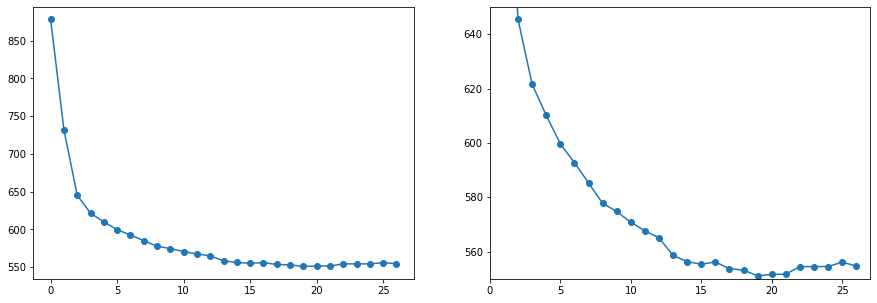

In [28]:
plt.figure(figsize=(15, 5))  
plt.subplot(1,2,1)
plt.scatter(list(range(X_train.shape[1])),mse_list)
plt.plot(list(range(X_train.shape[1])),mse_list)
#plt.axis([0, X_train.shape[1], 0, 5])

plt.subplot(1,2,2)
plt.scatter(list(range(X_train.shape[1])),mse_list)
plt.plot(list(range(X_train.shape[1])),mse_list)
plt.axis([0, X_train.shape[1], 550, 650])


In [29]:
# Diez caracteristicas parece una buena eleccion
feature_ranking[:14]

[9, 10, 5, 16, 15, 25, 24, 21, 3, 4, 2, 17, 7, 18]

In [30]:
alpha_vector = np.logspace(-5,4,20)
degree_vector = [1,2,3]#np.linspace(1,3,3)

param_grid = {'poly__degree':degree_vector,'model__alpha': alpha_vector}
steps = [
    ('poly', PolynomialFeatures()),
    ('model', Ridge())
]

pipeline = Pipeline(steps)


grid = GridSearchCV(pipeline, scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose = 3,n_jobs =6)
grid.fit(X_train[:,feature_ranking[:14]], y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    1.6s


best mean cross-validation score: -558.248
best parameters: {'model__alpha': 42.81332398719387, 'poly__degree': 1}


[Parallel(n_jobs=6)]: Done 300 out of 300 | elapsed:    8.9s finished


In [31]:
#Preparamos la matriz de test
df_test = pd.read_csv('./test.csv', sep=';', decimal='.')
df_test_X = df_test[feature_names]
df_test_X["Price"] = df_test["Price"]

<ipython-input-31-a7efb9322a6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_X["Price"] = df_test["Price"]


In [32]:
#Categorizo las variables tipo objeto
means_1 = df_train.groupby('Cancellation Policy')['Price'].mean()
means_2 = df_test_X.groupby('Bed Type')['Price'].mean()
means_3 = df_test_X.groupby('Room Type')['Price'].mean()
means_4 = df_test_X.groupby('Property Type')['Price'].mean()
means_5 = df_test_X.groupby('Country Code')['Price'].mean()
means_6 = df_test_X.groupby('Market')['Price'].mean()
means_7 = df_test_X.groupby('Zipcode')['Price'].mean()
means_8 = df_test_X.groupby('Neighbourhood Group Cleansed')['Price'].mean()
means_9 = df_test_X.groupby('Host Response Time')['Price'].mean()
means_10 = df_test_X.groupby('Experiences Offered')['Price'].mean()

df_test_X['Cancellation Policy'] = df_test_X['Cancellation Policy'].map(means_1)
df_test_X['Bed Type'] = df_test_X['Bed Type'].map(means_2)
df_test_X['Room Type'] = df_test_X['Room Type'].map(means_3)
df_test_X['Property Type'] = df_test_X['Property Type'].map(means_4)
df_test_X['Country Code'] = df_test_X['Country Code'].map(means_5)
df_test_X['Market'] = df_test_X['Market'].map(means_6)
df_test_X['Zipcode'] = df_test_X['Zipcode'].map(means_7)
df_test_X['Neighbourhood Group Cleansed'] = df_test_X['Neighbourhood Group Cleansed'].map(means_8)
df_test_X['Host Response Time'] = df_test_X['Host Response Time'].map(means_9)
df_test_X['Experiences Offered'] = df_test_X['Experiences Offered'].map(means_10)

<ipython-input-32-641f1ceec5f8>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_X['Cancellation Policy'] = df_test_X['Cancellation Policy'].map(means_1)
<ipython-input-32-641f1ceec5f8>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_X['Bed Type'] = df_test_X['Bed Type'].map(means_2)
<ipython-input-32-641f1ceec5f8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [33]:
# Me deshago de los valores Na sustituyendo como antes

df_test_X["Cancellation Policy"].fillna(df_test_X["Cancellation Policy"].mode(), inplace=True)
df_test_X["Bed Type"].fillna(df_test_X["Bed Type"].mode(), inplace=True)
df_test_X["Room Type"].fillna(df_test_X["Room Type"].mode(), inplace=True)
df_test_X["Property Type"].fillna(df_test_X["Property Type"].mode(), inplace=True)
df_test_X["Country Code"].fillna(df_test_X["Country Code"].mode(), inplace=True)
df_test_X["Market"].fillna(df_test_X["Market"].mode(), inplace=True)
df_test_X["Experiences Offered"].fillna(73.60, inplace=True)
df_test_X["Cleaning Fee"].fillna(value=0, inplace=True)
df_test_X["Guests Included"].fillna(value=0, inplace=True)
df_test_X["Extra People"].fillna(value=0, inplace=True)
df_test_X["Minimum Nights"].fillna(value=0, inplace=True)
df_test_X.fillna(df_test_X.mean()[0], inplace=True)

C:\Users\jimmy\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\jimmy\anaconda3\lib\site-packages\pandas\core\frame.py:4317: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [34]:
#Preparamos las matrices para introducirlas en el modelo de regresion polinomica
columns = feature_names[feature_ranking[:14]].tolist()
y_test = df_test_X.iloc[:,df_test_X.columns.get_loc("Price")].values
df_test_X = df_test_X.drop("Price",axis=1)
X_test = df_test_X[columns].values

scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [35]:
columns

['Room Type',
 'Accommodates',
 'Zipcode',
 'Cleaning Fee',
 'Security Deposit',
 'Review Scores Value',
 'Review Scores Rating',
 'Availability 30',
 'Host Listings Count',
 'Neighbourhood Group Cleansed',
 'Host Response Rate',
 'Guests Included',
 'Country Code',
 'Extra People']

In [36]:
#Vamos a compara el test con el train
y_hat = grid.predict(X_test)
value_model = np.mean((y_test.reshape(-1,1)-y_hat)**2)


In [37]:
value_model

6445.219963022928